In [1]:
!pip install creme dask_ml

import dask.dataframe as dd
import numpy as np
import pandas as pd

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = ""
os.environ['KAGGLE_KEY'] = ""

!kaggle competitions download -c microsoft-malware-prediction
!unzip train.csv.zip
!unzip test.csv.zip

In [2]:
!ls

Malware Prediction.ipynb requirements.txt         test.csv
dask-worker-space        result.csv               train.csv
output                   sample_submission.csv


In [3]:
# from dask.distributed import Client, progress

# you should be able to see a Dashboard link here, if you don't try to first run `dask-scheduler` on your terminal
# client = Client(processes=True, threads_per_worker=2, n_workers=2, memory_limit='3GB')
# client

Client Scheduler: tcp://127.0.0.1:50887 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 4 Memory: 6.00 GB


In [3]:
# Dataset can be downloaded from here: https://www.kaggle.com/c/microsoft-malware-prediction/data
df = dd.read_csv("train.csv",
                 low_memory=True,
                 blocksize=10e6,
                 dtype={
                     'AVProductStatesIdentifier': 'float64',
                     'AVProductsEnabled': 'float64',
                     'AVProductsInstalled': 'float64',
                     'GeoNameIdentifier': 'float64',
                     'IsProtected': 'float64',
                     'PuaMode': 'object'
                 }, )

print("npartitions", df.npartitions)
df.head()

npartitions 439


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [4]:
%%time

df_sample = df.sample(frac=0.001).compute()

CPU times: user 5min 32s, sys: 40.3 s, total: 6min 13s
Wall time: 4min 13s


In [5]:
print("len(df_sample)", len(df_sample))
df_sample[0:1].T[0:60]

len(df_sample) 8770


,6170
MachineIdentifier,002d3fa2ed73ddcbfd70a0c0148fc35d
ProductName,win8defender
EngineVersion,1.1.15100.1
AppVersion,4.18.1807.18075
AvSigVersion,1.273.1574.0
IsBeta,0
RtpStateBitfield,7
IsSxsPassiveMode,0
DefaultBrowsersIdentifier,NaN
AVProductStatesIdentifier,53447


In [6]:
df_sample[0:1].T[60:83]

,6170
Census_OSSkuName,PROFESSIONAL
Census_OSInstallTypeName,IBSClean
Census_OSInstallLanguageIdentifier,8
Census_OSUILocaleIdentifier,31
Census_OSWUAutoUpdateOptionsName,UNKNOWN
Census_IsPortableOperatingSystem,0
Census_GenuineStateName,IS_GENUINE
Census_ActivationChannel,Retail
Census_IsFlightingInternal,NaN
Census_IsFlightsDisabled,0


In [7]:
identifier_columns = [x for x in df.columns if 'Identifier' in x]
identifier_columns += [
        'EngineVersion',
        'AppVersion',
        'AvSigVersion',
        'OsVer',
        'OsBuild',
        'OsSuite',
        'OsPlatformSubRelease',
        'OsBuildLab',
        'Census_OSVersion',
        'Census_OSBuildNumber',
        'Census_OSBuildRevision',
    ]
for col in identifier_columns:
    cats = df_sample[col].astype('category')
    print(col, "categories:", len(cats.cat.categories))

MachineIdentifier categories: 8770
DefaultBrowsersIdentifier categories: 82
AVProductStatesIdentifier categories: 475
CountryIdentifier categories: 191
CityIdentifier categories: 3318
OrganizationIdentifier categories: 23
GeoNameIdentifier categories: 165
LocaleEnglishNameIdentifier categories: 132
IeVerIdentifier categories: 81
Census_OEMNameIdentifier categories: 273
Census_OEMModelIdentifier categories: 3621
Census_ProcessorManufacturerIdentifier categories: 2
Census_ProcessorModelIdentifier categories: 938
Census_OSInstallLanguageIdentifier categories: 39
Census_OSUILocaleIdentifier categories: 48
Census_FirmwareManufacturerIdentifier categories: 74
Census_FirmwareVersionIdentifier categories: 3278
Wdft_RegionIdentifier categories: 15
EngineVersion categories: 35
AppVersion categories: 58
AvSigVersion categories: 1541
OsVer categories: 4
OsBuild categories: 21
OsSuite categories: 5
OsPlatformSubRelease categories: 9
OsBuildLab categories: 190
Census_OSVersion categories: 175
Census

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression


all_categories = {}
categoricals = [
    'EngineVersion',
    'AppVersion',
    'OsVer',
    'OsBuild',
    'OsSuite',
    'OsPlatformSubRelease',
    'Census_OSVersion',
    'Census_OSBuildNumber',
    'Census_OSBuildRevision',

    'CountryIdentifier',
    'OrganizationIdentifier',
    'LocaleEnglishNameIdentifier',
    'IeVerIdentifier',
    'Census_ProcessorManufacturerIdentifier',
    'Census_OSInstallLanguageIdentifier',
    'Census_OSUILocaleIdentifier',
    'Census_FirmwareManufacturerIdentifier',
    'Wdft_RegionIdentifier',

    'ProductName',
    'Platform',
    'Processor',
    'SkuEdition',
    'PuaMode',
    'SmartScreen',
    'Census_MDC2FormFactor',
    'Census_DeviceFamily',
    'Census_ProcessorClass',
    'Census_PrimaryDiskTypeName',
    'Census_ChassisTypeName',
    'Census_PowerPlatformRoleName',
    'Census_InternalBatteryType',
    'Census_OSArchitecture',
    'Census_OSBranch',
    'Census_OSEdition',
    'Census_OSSkuName',
    'Census_OSInstallTypeName',
    'Census_OSWUAutoUpdateOptionsName',
    'Census_GenuineStateName',
    'Census_ActivationChannel',
    'Census_FlightRing',
]
droplist = [
    'HasDetections',
    'AvSigVersion',
    'OsBuildLab',
]
droplist += [x for x in df.columns if 'Identifier' in x and x not in categoricals]

def get_features_labels(df, n=None):
    global all_categories
    
    if n is None:
        df_ = df
    else:
        df_ = df.sample(n)

    for c in categoricals:
        if c not in all_categories:
            df_[c] = df_[c].astype('category')
            all_categories[c] = df_[c].cat.categories
        else:
            df_[c] = pd.Categorical(df_[c], categories = all_categories[c])
    df_ = pd.get_dummies(df_, columns=categoricals)

    X = df_.drop(droplist, axis=1)
    X = X.fillna(-1)
    
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    
    y = df_['HasDetections'].tolist()

    return X, y

X, y = get_features_labels(df_sample, 1000)
print("len(X)", len(X))
cols = X[0:1].T
# cols['type'] = X.dtypes.values
cols

len(X) 1000


array([[0.        ],
       [0.88888889],
       [0.        ],
       [0.33333333],
       [0.5       ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.2       ],
       [0.03000277],
       [0.02986279],
       [0.        ],
       [0.25001831],
       [0.22510232],
       [0.33365877],
       [0.35585377],
       [1.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.5       ],
       [0.        ],
       [0.        ],
       [0.5       ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.   

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.65      0.60       124
           1       0.59      0.50      0.54       126

    accuracy                           0.57       250
   macro avg       0.57      0.57      0.57       250
weighted avg       0.57      0.57      0.57       250



/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [31]:
print("True amount", y.count(1))
print("False amout", y.count(0))

True amount 471
False amout 529


Apparently we don't have class imbalance, thats good, less work for us

### First a simple model:

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression

X, y = get_features_labels(df_sample, 1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(solver='lbfgs', max_iter=3000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.65      0.58       114
           1       0.63      0.50      0.56       136

    accuracy                           0.57       250
   macro avg       0.58      0.57      0.57       250
weighted avg       0.58      0.57      0.57       250



### Now let's see if more data helps

In [35]:
%%time
from sklearn.metrics import f1_score

def train_sample(n):
    X, y = get_features_labels(df_sample, n)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    model = LogisticRegression(solver='lbfgs', max_iter=3000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred)
    f1_train = f1_score(y_train, y_pred)
    
    y_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    
    return acc_train, f1_train, acc_test, f1_test
    
total = len(df_sample)
accs_train = []
f1s_train = []
accs_test = []
f1s_test = []
runs = 20
for i in range(1,runs + 1):
    print("Training with", int(100 * (i / runs)), "% of the samples\n", end="\r")

    n = int(total * (i / runs))
    acc_train, f1_train, acc_test, f1_test = train_sample(n)
    accs_train.append(acc_train)
    f1s_train.append(f1_train)
    accs_test.append(acc_test)
    f1s_test.append(f1_test)

Training with 5 % of the samples
Training with 10 % of the samples
Training with 15 % of the samples
Training with 20 % of the samples
Training with 25 % of the samples
Training with 30 % of the samples
Training with 35 % of the samples
Training with 40 % of the samples
Training with 45 % of the samples
Training with 50 % of the samples
Training with 55 % of the samples
Training with 60 % of the samples
Training with 65 % of the samples
Training with 70 % of the samples
Training with 75 % of the samples
Training with 80 % of the samples
Training with 85 % of the samples
Training with 90 % of the samples
Training with 95 % of the samples
Training with 100 % of the samples
CPU times: user 59.6 s, sys: 4.4 s, total: 1min 4s
Wall time: 35.5 s


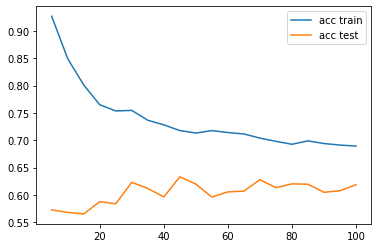

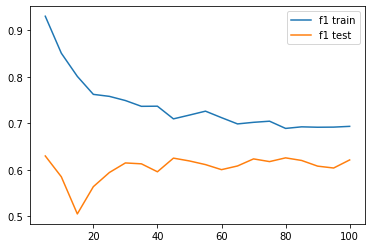

In [36]:
import matplotlib.pyplot as plt

plt.subplots()
plt.plot(np.arange(1, runs + 1) * 5, accs_train, label='acc train')
plt.plot(np.arange(1, runs + 1) * 5, accs_test, label='acc test')
plt.legend()

plt.subplots()
plt.plot(np.arange(1, runs + 1) * 5, f1s_train, label='f1 train')
plt.plot(np.arange(1, runs + 1) * 5, f1s_test, label='f1 test')
plt.legend()

plt.show()

Not that much, after 30% of the data accuracy and f1 pretty much statys the same, and still very low, let's work on the model then

### Finding a good model

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sklearn.linear_model as linear_model
import sklearn.ensemble as ensemble
import sklearn.neural_network as neural_network

def run_grid_search(X, y):
    model = Pipeline(steps=[('clf', LogisticRegression())])

    estimator = GridSearchCV(model, cv=3, param_grid=[
        {"clf": [
            linear_model.LogisticRegression(solver='lbfgs', max_iter=3000),
            linear_model.LogisticRegressionCV(cv=3, max_iter=3000),
            linear_model.Perceptron(max_iter=3000, tol=1e-3),
            linear_model.RidgeClassifier(),
            linear_model.SGDClassifier(max_iter=3000, tol=1e-3),
            linear_model.BayesianRidge(),
            linear_model.PassiveAggressiveClassifier(max_iter=3000, tol=1e-3),
            ensemble.AdaBoostClassifier(),
            ensemble.BaggingClassifier(),
            ensemble.ExtraTreesClassifier(),
            ensemble.GradientBoostingClassifier(),
            ensemble.RandomForestClassifier(n_estimators=100),
            ensemble.VotingClassifier(estimators=[
                ("gb", ensemble.GradientBoostingClassifier()),
                ("lr", linear_model.LogisticRegressionCV(cv=3)),
                ("bc", ensemble.BaggingClassifier()),
                ("rfc", ensemble.RandomForestClassifier(n_estimators=100))
            ]),
            neural_network.MLPClassifier(hidden_layer_sizes=(200,),activation='tanh')
        ]}
    ])
    estimator.fit(X, y)

    print("Best Score", estimator.best_score_)
    print(type(estimator.best_params_['clf']))
    
    return estimator
    
X, y = get_features_labels(df_sample, 5000)
model = run_grid_search(X, y)

/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/li

/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: C

Best Score 0.6218
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>


### Now let's try with keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Lambda
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

X, y = get_features_labels(df_sample, 10000)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = Sequential()
model.add(Dense(units=X.shape[1] * 2,
                input_shape=(X.shape[1],),
                activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units=X.shape[1] * 4,
#                 activation='relu'))
# for i in range(0, 15):
#     model.add(Dense(units=128, activation='relu'))
# model.add(Lambda(lambda x: tf.expand_dims(model.output, axis=-1)))
# model.add(LSTM(units=128))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='auto', min_delta=0.01, verbose=1)
history = model.fit(X_train, y_train, batch_size=50, epochs=500, verbose=1, callbacks=[early_stop],
                    validation_data=(X_test, y_test))

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("\n\nEvaluation result on Test Data : Loss = {}, accuracy = {}".format(
    test_loss, test_acc))

In [ ]:
# Plot the Loss Curves
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

# Plot the Accuracy Curves
plt.figure(figsize=[8, 6])
plt.plot(history.history['acc'], 'r', linewidth=3.0)
plt.plot(history.history['val_acc'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

The network is **completely biased**, I've never seen so much bias, and still, acurracy is shit

Let's try to use online learning to train on the full sample

In [32]:
ddf_sample = dd.from_pandas(df_sample, npartitions=5)

In [117]:
%%time

from creme import compose, linear_model, metrics, model_selection, optim, preprocessing, stream
from sklearn import datasets
from IPython.display import display
import sys

def train_with_creme(df):
    metric = metrics.Accuracy()
    one_hot = compose.TransformerUnion([
        preprocessing.OneHotEncoder(c, sparse=True) for c in categoricals
    ])
    scaler = preprocessing.StandardScaler()
    lin_reg = linear_model.LogisticRegression(optimizer=optim.AdaGrad())
    model = one_hot | scaler | lin_reg

    df = df.fillna(-1)
#     df = df.categorize(columns=categoricals)
    for c in categoricals:
        df[c] = df[c].astype('category')
        
    for i in range(df.npartitions):
        df_partition = df.get_partition(i).compute()
        print("training partition", i, "with", len(df_partition), "rows")
        
        X = df_partition.drop(droplist, axis='columns')
        y = df_partition['HasDetections']
        X_y = stream.iter_pandas(X, y)
        
        index = 0
        for x, y in X_y:
            index += 1
            if index % 1000 == 0:
                print("trained", index, metric)
            y_pred = model.predict_one(x)
            model = model.fit_one(x, y)
            metric = metric.update(y, y_pred)

    print(metric)
    return model

model_creme = train_with_creme(ddf_sample)

training partition 0 with 1782 rows
trained 1000 Accuracy: 0.485485
training partition 1 with 1782 rows
trained 1000 Accuracy: 0.484358
training partition 2 with 1782 rows
trained 1000 Accuracy: 0.497041
training partition 3 with 1782 rows
trained 1000 Accuracy: 0.496769
training partition 4 with 1779 rows
trained 1000 Accuracy: 0.502276
Accuracy: 0.499158
CPU times: user 20.3 s, sys: 403 ms, total: 20.7 s
Wall time: 21 s


In [106]:
X = df_sample.drop(droplist, axis='columns')
y = df_sample['HasDetections'].values.tolist()

X_y = stream.iter_pandas(X, y)
y_preds = []
for x, y_ in X_y:
    y_preds.append(model_creme.predict_one(x))

In [109]:
print(classification_report(y, y_preds))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      4446
           1       0.00      0.00      0.00      4461

    accuracy                           0.50      8907
   macro avg       0.25      0.50      0.33      8907
weighted avg       0.25      0.50      0.33      8907



In [54]:
from pprint import pprint
from time import time
import logging
import warnings

from dask_ml.preprocessing import OneHotEncoder, StandardScaler
from dask_ml.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from dask_ml.wrappers import ParallelPostFit
from sklearn.externals import joblib
from dask_ml.model_selection import train_test_split

pipeline = Pipeline([
    ('one_hot', ColumnTransformer([
      ('categorical', OneHotEncoder(sparse=True), categoricals)
    ])),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(verbose=1)),
])

df_ = dd.from_pandas(df_sample, npartitions=5)
df_ = df_.fillna(-1)
df_ = df_.categorize(columns=categoricals)
    
X = df_.drop(droplist, axis='columns')
y = df_['HasDetections']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model_dask = pipeline

with joblib.parallel_backend('dask'):
    print("Fitting...")
    model_dask.fit(X_train, y_train)

Fitting...


/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/dask/blockwise.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  contains = index in indices
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

In [22]:
y_pred = model_dask.predict(X_test)
print(classification_report(y_test, y_pred))

/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/dask/blockwise.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  contains = index in indices


              precision    recall  f1-score   support

           0       0.56      0.58      0.57       449
           1       0.57      0.55      0.56       458

    accuracy                           0.57       907
   macro avg       0.57      0.57      0.57       907
weighted avg       0.57      0.57      0.57       907



# Using the whole data

In [118]:
model_creme_full = train_with_creme(df)

training partition 0 with 20343 rows
trained 1000 Accuracy: 0.487487
trained 2000 Accuracy: 0.484242
trained 3000 Accuracy: 0.481494
trained 4000 Accuracy: 0.493123
trained 5000 Accuracy: 0.492699
trained 6000 Accuracy: 0.490415
trained 7000 Accuracy: 0.493642
trained 8000 Accuracy: 0.494687
trained 9000 Accuracy: 0.493277
trained 10000 Accuracy: 0.494949
trained 11000 Accuracy: 0.495591
trained 12000 Accuracy: 0.495791
trained 13000 Accuracy: 0.498269
trained 14000 Accuracy: 0.500464
trained 15000 Accuracy: 0.5009
trained 16000 Accuracy: 0.501406
trained 17000 Accuracy: 0.501559
trained 18000 Accuracy: 0.500472
trained 19000 Accuracy: 0.499184
trained 20000 Accuracy: 0.499025
training partition 1 with 20352 rows
trained 1000 Accuracy: 0.497891
trained 2000 Accuracy: 0.497538
trained 3000 Accuracy: 0.498329
trained 4000 Accuracy: 0.497453
trained 5000 Accuracy: 0.497277
trained 6000 Accuracy: 0.498368
trained 7000 Accuracy: 0.498391
trained 8000 Accuracy: 0.498659
trained 9000 Accuracy

training partition 12 with 20347 rows
trained 1000 Accuracy: 0.499453
trained 2000 Accuracy: 0.499525
trained 3000 Accuracy: 0.499527
trained 4000 Accuracy: 0.499613
trained 5000 Accuracy: 0.499671
trained 6000 Accuracy: 0.499704
trained 7000 Accuracy: 0.499701
trained 8000 Accuracy: 0.499691
trained 9000 Accuracy: 0.499656
trained 10000 Accuracy: 0.499583
trained 11000 Accuracy: 0.49962
trained 12000 Accuracy: 0.499594
trained 13000 Accuracy: 0.499666
trained 14000 Accuracy: 0.499644
trained 15000 Accuracy: 0.499718
trained 16000 Accuracy: 0.499677
trained 17000 Accuracy: 0.499701
trained 18000 Accuracy: 0.499763
trained 19000 Accuracy: 0.499753
trained 20000 Accuracy: 0.499655
training partition 13 with 20348 rows
trained 1000 Accuracy: 0.499708
trained 2000 Accuracy: 0.499675
trained 3000 Accuracy: 0.499665
trained 4000 Accuracy: 0.499763
trained 5000 Accuracy: 0.499698
trained 6000 Accuracy: 0.499784
trained 7000 Accuracy: 0.499667
trained 8000 Accuracy: 0.49969
trained 9000 Accura

trained 20000 Accuracy: 0.499208
training partition 24 with 20344 rows
trained 1000 Accuracy: 0.499237
trained 2000 Accuracy: 0.499269
trained 3000 Accuracy: 0.49935
trained 4000 Accuracy: 0.499333
trained 5000 Accuracy: 0.499275
trained 6000 Accuracy: 0.499279
trained 7000 Accuracy: 0.499264
trained 8000 Accuracy: 0.499247
trained 9000 Accuracy: 0.499227
trained 10000 Accuracy: 0.499238
trained 11000 Accuracy: 0.499212
trained 12000 Accuracy: 0.499216
trained 13000 Accuracy: 0.499243
trained 14000 Accuracy: 0.499245
trained 15000 Accuracy: 0.499274
trained 16000 Accuracy: 0.49921
trained 17000 Accuracy: 0.499194
trained 18000 Accuracy: 0.499152
trained 19000 Accuracy: 0.499157
trained 20000 Accuracy: 0.499169
training partition 25 with 20348 rows
trained 1000 Accuracy: 0.499167
trained 2000 Accuracy: 0.49913
trained 3000 Accuracy: 0.499098
trained 4000 Accuracy: 0.499084
trained 5000 Accuracy: 0.499053
trained 6000 Accuracy: 0.499055
trained 7000 Accuracy: 0.499027
trained 8000 Accura

trained 19000 Accuracy: 0.499822
trained 20000 Accuracy: 0.499798
training partition 36 with 20348 rows
trained 1000 Accuracy: 0.499782
trained 2000 Accuracy: 0.49979
trained 3000 Accuracy: 0.499789
trained 4000 Accuracy: 0.499809
trained 5000 Accuracy: 0.499813
trained 6000 Accuracy: 0.499832
trained 7000 Accuracy: 0.499823
trained 8000 Accuracy: 0.499818
trained 9000 Accuracy: 0.499853
trained 10000 Accuracy: 0.499848
trained 11000 Accuracy: 0.499876
trained 12000 Accuracy: 0.49988
trained 13000 Accuracy: 0.499873
trained 14000 Accuracy: 0.499854
trained 15000 Accuracy: 0.499862
trained 16000 Accuracy: 0.499888
trained 17000 Accuracy: 0.499881
trained 18000 Accuracy: 0.499912
trained 19000 Accuracy: 0.499925
trained 20000 Accuracy: 0.49994
training partition 37 with 20348 rows
trained 1000 Accuracy: 0.499936
trained 2000 Accuracy: 0.499932
trained 3000 Accuracy: 0.499926
trained 4000 Accuracy: 0.499925
trained 5000 Accuracy: 0.499894
trained 6000 Accuracy: 0.49988
trained 7000 Accura

trained 18000 Accuracy: 0.500206
trained 19000 Accuracy: 0.500174
trained 20000 Accuracy: 0.500179
training partition 48 with 20344 rows
trained 1000 Accuracy: 0.500161
trained 2000 Accuracy: 0.500134
trained 3000 Accuracy: 0.500141
trained 4000 Accuracy: 0.500146
trained 5000 Accuracy: 0.50015
trained 6000 Accuracy: 0.500143
trained 7000 Accuracy: 0.500109
trained 8000 Accuracy: 0.500103
trained 9000 Accuracy: 0.500088
trained 10000 Accuracy: 0.500079
trained 11000 Accuracy: 0.500067
trained 12000 Accuracy: 0.500075
trained 13000 Accuracy: 0.500085
trained 14000 Accuracy: 0.500116
trained 15000 Accuracy: 0.500138
trained 16000 Accuracy: 0.50015
trained 17000 Accuracy: 0.500119
trained 18000 Accuracy: 0.500126
trained 19000 Accuracy: 0.50013
trained 20000 Accuracy: 0.500146
training partition 49 with 20350 rows
trained 1000 Accuracy: 0.500174
trained 2000 Accuracy: 0.500166
trained 3000 Accuracy: 0.500188
trained 4000 Accuracy: 0.500182
trained 5000 Accuracy: 0.500188
trained 6000 Accu

trained 17000 Accuracy: 0.500195
trained 18000 Accuracy: 0.500198
trained 19000 Accuracy: 0.50019
trained 20000 Accuracy: 0.500177
training partition 60 with 20339 rows
trained 1000 Accuracy: 0.500172
trained 2000 Accuracy: 0.500177
trained 3000 Accuracy: 0.500151
trained 4000 Accuracy: 0.500161
trained 5000 Accuracy: 0.500153
trained 6000 Accuracy: 0.500141
trained 7000 Accuracy: 0.500137
trained 8000 Accuracy: 0.500119
trained 9000 Accuracy: 0.500098
trained 10000 Accuracy: 0.500117
trained 11000 Accuracy: 0.5001
trained 12000 Accuracy: 0.500123
trained 13000 Accuracy: 0.500131
trained 14000 Accuracy: 0.500136
trained 15000 Accuracy: 0.500148
trained 16000 Accuracy: 0.500132
trained 17000 Accuracy: 0.500084
trained 18000 Accuracy: 0.500092
trained 19000 Accuracy: 0.50008
trained 20000 Accuracy: 0.500071
training partition 61 with 20349 rows
trained 1000 Accuracy: 0.500046
trained 2000 Accuracy: 0.500046
trained 3000 Accuracy: 0.500042
trained 4000 Accuracy: 0.500069
trained 5000 Accu

trained 16000 Accuracy: 0.500082
trained 17000 Accuracy: 0.500089
trained 18000 Accuracy: 0.500092
trained 19000 Accuracy: 0.500095
trained 20000 Accuracy: 0.500097
training partition 72 with 20355 rows
trained 1000 Accuracy: 0.500082
trained 2000 Accuracy: 0.500076
trained 3000 Accuracy: 0.500071
trained 4000 Accuracy: 0.500064
trained 5000 Accuracy: 0.500077
trained 6000 Accuracy: 0.500082
trained 7000 Accuracy: 0.500075
trained 8000 Accuracy: 0.500091
trained 9000 Accuracy: 0.500088
trained 10000 Accuracy: 0.500086
trained 11000 Accuracy: 0.500092
trained 12000 Accuracy: 0.500096
trained 13000 Accuracy: 0.50009
trained 14000 Accuracy: 0.500076
trained 15000 Accuracy: 0.500074
trained 16000 Accuracy: 0.500075
trained 17000 Accuracy: 0.500077
trained 18000 Accuracy: 0.500091
trained 19000 Accuracy: 0.500073
trained 20000 Accuracy: 0.500075
training partition 73 with 20349 rows
trained 1000 Accuracy: 0.500065
trained 2000 Accuracy: 0.500073
trained 3000 Accuracy: 0.500075
trained 4000 

trained 15000 Accuracy: 0.499996
trained 16000 Accuracy: 0.499979
trained 17000 Accuracy: 0.499989
trained 18000 Accuracy: 0.499984
trained 19000 Accuracy: 0.499981
trained 20000 Accuracy: 0.499974
training partition 84 with 20343 rows
trained 1000 Accuracy: 0.499975
trained 2000 Accuracy: 0.499979
trained 3000 Accuracy: 0.499992
trained 4000 Accuracy: 0.499991
trained 5000 Accuracy: 0.499987
trained 6000 Accuracy: 0.499992
trained 7000 Accuracy: 0.49999
trained 8000 Accuracy: 0.499996
trained 9000 Accuracy: 0.49998
trained 10000 Accuracy: 0.499995
trained 11000 Accuracy: 0.499997
trained 12000 Accuracy: 0.500008
trained 13000 Accuracy: 0.499997
trained 14000 Accuracy: 0.499994
trained 15000 Accuracy: 0.499994
trained 16000 Accuracy: 0.499996
trained 17000 Accuracy: 0.499988
trained 18000 Accuracy: 0.499991
trained 19000 Accuracy: 0.49998
trained 20000 Accuracy: 0.499976
training partition 85 with 20349 rows
trained 1000 Accuracy: 0.499971
trained 2000 Accuracy: 0.499973
trained 3000 A

trained 14000 Accuracy: 0.500048
trained 15000 Accuracy: 0.500054
trained 16000 Accuracy: 0.500032
trained 17000 Accuracy: 0.500033
trained 18000 Accuracy: 0.500046
trained 19000 Accuracy: 0.500033
trained 20000 Accuracy: 0.500032
training partition 96 with 20338 rows
trained 1000 Accuracy: 0.500042
trained 2000 Accuracy: 0.500051
trained 3000 Accuracy: 0.500045
trained 4000 Accuracy: 0.500055
trained 5000 Accuracy: 0.500048
trained 6000 Accuracy: 0.500059
trained 7000 Accuracy: 0.500058
trained 8000 Accuracy: 0.500057
trained 9000 Accuracy: 0.500051
trained 10000 Accuracy: 0.50006
trained 11000 Accuracy: 0.500055
trained 12000 Accuracy: 0.500025
trained 13000 Accuracy: 0.500017
trained 14000 Accuracy: 0.500033
trained 15000 Accuracy: 0.500039
trained 16000 Accuracy: 0.500038
trained 17000 Accuracy: 0.500034
trained 18000 Accuracy: 0.500049
trained 19000 Accuracy: 0.500049
trained 20000 Accuracy: 0.50003
training partition 97 with 20352 rows
trained 1000 Accuracy: 0.500022
trained 2000

trained 13000 Accuracy: 0.499994
trained 14000 Accuracy: 0.500005
trained 15000 Accuracy: 0.499996
trained 16000 Accuracy: 0.499995
trained 17000 Accuracy: 0.500003
trained 18000 Accuracy: 0.50001
trained 19000 Accuracy: 0.500008
trained 20000 Accuracy: 0.500009
training partition 108 with 20344 rows
trained 1000 Accuracy: 0.500013
trained 2000 Accuracy: 0.500018
trained 3000 Accuracy: 0.50001
trained 4000 Accuracy: 0.500011
trained 5000 Accuracy: 0.500011
trained 6000 Accuracy: 0.500019
trained 7000 Accuracy: 0.500018
trained 8000 Accuracy: 0.500027
trained 9000 Accuracy: 0.500023
trained 10000 Accuracy: 0.500031
trained 11000 Accuracy: 0.500033
trained 12000 Accuracy: 0.500028
trained 13000 Accuracy: 0.500028
trained 14000 Accuracy: 0.500024
trained 15000 Accuracy: 0.500026
trained 16000 Accuracy: 0.500034
trained 17000 Accuracy: 0.500043
trained 18000 Accuracy: 0.500054
trained 19000 Accuracy: 0.500053
trained 20000 Accuracy: 0.500065
training partition 109 with 20349 rows
trained 1

trained 12000 Accuracy: 0.500246
trained 13000 Accuracy: 0.500245
trained 14000 Accuracy: 0.500226
trained 15000 Accuracy: 0.50023
trained 16000 Accuracy: 0.500234
trained 17000 Accuracy: 0.500231
trained 18000 Accuracy: 0.500228
trained 19000 Accuracy: 0.500231
trained 20000 Accuracy: 0.500232
training partition 120 with 20344 rows
trained 1000 Accuracy: 0.500236
trained 2000 Accuracy: 0.500241
trained 3000 Accuracy: 0.500235
trained 4000 Accuracy: 0.500241
trained 5000 Accuracy: 0.500252
trained 6000 Accuracy: 0.500252
trained 7000 Accuracy: 0.500243
trained 8000 Accuracy: 0.500241
trained 9000 Accuracy: 0.500243
trained 10000 Accuracy: 0.500241
trained 11000 Accuracy: 0.500248
trained 12000 Accuracy: 0.500245
trained 13000 Accuracy: 0.500245
trained 14000 Accuracy: 0.500245
trained 15000 Accuracy: 0.500248
trained 16000 Accuracy: 0.500247
trained 17000 Accuracy: 0.500248
trained 18000 Accuracy: 0.500247
trained 19000 Accuracy: 0.500244
trained 20000 Accuracy: 0.50023
training partit

trained 11000 Accuracy: 0.500298
trained 12000 Accuracy: 0.500301
trained 13000 Accuracy: 0.500296
trained 14000 Accuracy: 0.500296
trained 15000 Accuracy: 0.500301
trained 16000 Accuracy: 0.500308
trained 17000 Accuracy: 0.50032
trained 18000 Accuracy: 0.50031
trained 19000 Accuracy: 0.50031
trained 20000 Accuracy: 0.50031
training partition 132 with 20344 rows
trained 1000 Accuracy: 0.500304
trained 2000 Accuracy: 0.500298
trained 3000 Accuracy: 0.500297
trained 4000 Accuracy: 0.500301
trained 5000 Accuracy: 0.500295
trained 6000 Accuracy: 0.500299
trained 7000 Accuracy: 0.500297
trained 8000 Accuracy: 0.500301
trained 9000 Accuracy: 0.500305
trained 10000 Accuracy: 0.500309
trained 11000 Accuracy: 0.500325
trained 12000 Accuracy: 0.500322
trained 13000 Accuracy: 0.500321
trained 14000 Accuracy: 0.500309
trained 15000 Accuracy: 0.500309
trained 16000 Accuracy: 0.500307
trained 17000 Accuracy: 0.500304
trained 18000 Accuracy: 0.500312
trained 19000 Accuracy: 0.500326
trained 20000 Acc

trained 10000 Accuracy: 0.500447
trained 11000 Accuracy: 0.500458
trained 12000 Accuracy: 0.500455
trained 13000 Accuracy: 0.500458
trained 14000 Accuracy: 0.500456
trained 15000 Accuracy: 0.500449
trained 16000 Accuracy: 0.500448
trained 17000 Accuracy: 0.500441
trained 18000 Accuracy: 0.500442
trained 19000 Accuracy: 0.500445
trained 20000 Accuracy: 0.500444
training partition 144 with 20340 rows
trained 1000 Accuracy: 0.500441
trained 2000 Accuracy: 0.500448
trained 3000 Accuracy: 0.500438
trained 4000 Accuracy: 0.50043
trained 5000 Accuracy: 0.500428
trained 6000 Accuracy: 0.500428
trained 7000 Accuracy: 0.500428
trained 8000 Accuracy: 0.500428
trained 9000 Accuracy: 0.500436
trained 10000 Accuracy: 0.500434
trained 11000 Accuracy: 0.500436
trained 12000 Accuracy: 0.500441
trained 13000 Accuracy: 0.500437
trained 14000 Accuracy: 0.500435
trained 15000 Accuracy: 0.500431
trained 16000 Accuracy: 0.500429
trained 17000 Accuracy: 0.500435
trained 18000 Accuracy: 0.500432
trained 19000 

trained 9000 Accuracy: 0.500525
trained 10000 Accuracy: 0.500526
trained 11000 Accuracy: 0.500534
trained 12000 Accuracy: 0.500527
trained 13000 Accuracy: 0.500529
trained 14000 Accuracy: 0.500532
trained 15000 Accuracy: 0.500544
trained 16000 Accuracy: 0.500546
trained 17000 Accuracy: 0.500536
trained 18000 Accuracy: 0.500525
trained 19000 Accuracy: 0.500524
trained 20000 Accuracy: 0.500521
training partition 156 with 20356 rows
trained 1000 Accuracy: 0.500521
trained 2000 Accuracy: 0.500523
trained 3000 Accuracy: 0.500514
trained 4000 Accuracy: 0.500519
trained 5000 Accuracy: 0.500522
trained 6000 Accuracy: 0.500524
trained 7000 Accuracy: 0.500528
trained 8000 Accuracy: 0.500532
trained 9000 Accuracy: 0.500544
trained 10000 Accuracy: 0.500547
trained 11000 Accuracy: 0.500543
trained 12000 Accuracy: 0.500542
trained 13000 Accuracy: 0.500542
trained 14000 Accuracy: 0.50055
trained 15000 Accuracy: 0.500547
trained 16000 Accuracy: 0.50055
trained 17000 Accuracy: 0.500547
trained 18000 Ac

trained 8000 Accuracy: 0.500485
trained 9000 Accuracy: 0.500487
trained 10000 Accuracy: 0.500488
trained 11000 Accuracy: 0.500485
trained 12000 Accuracy: 0.500479
trained 13000 Accuracy: 0.500474
trained 14000 Accuracy: 0.500473
trained 15000 Accuracy: 0.500476
trained 16000 Accuracy: 0.500477
trained 17000 Accuracy: 0.500479
trained 18000 Accuracy: 0.500482
trained 19000 Accuracy: 0.50048
trained 20000 Accuracy: 0.500473
training partition 168 with 20347 rows
trained 1000 Accuracy: 0.500468
trained 2000 Accuracy: 0.500466
trained 3000 Accuracy: 0.500458
trained 4000 Accuracy: 0.500463
trained 5000 Accuracy: 0.500459
trained 6000 Accuracy: 0.500461
trained 7000 Accuracy: 0.500461
trained 8000 Accuracy: 0.500455
trained 9000 Accuracy: 0.50046
trained 10000 Accuracy: 0.500458
trained 11000 Accuracy: 0.500461
trained 12000 Accuracy: 0.500455
trained 13000 Accuracy: 0.50045
trained 14000 Accuracy: 0.500453
trained 15000 Accuracy: 0.500453
trained 16000 Accuracy: 0.500452
trained 17000 Accu

trained 6000 Accuracy: 0.500395
trained 7000 Accuracy: 0.500394
trained 8000 Accuracy: 0.500392
trained 9000 Accuracy: 0.500396
trained 10000 Accuracy: 0.500398
trained 11000 Accuracy: 0.500398
trained 12000 Accuracy: 0.5004
trained 13000 Accuracy: 0.500408
trained 14000 Accuracy: 0.500413
trained 15000 Accuracy: 0.500416
trained 16000 Accuracy: 0.500417
trained 17000 Accuracy: 0.500412
trained 18000 Accuracy: 0.500414
trained 19000 Accuracy: 0.500416
trained 20000 Accuracy: 0.500426
training partition 180 with 20344 rows
trained 1000 Accuracy: 0.500417
trained 2000 Accuracy: 0.500412
trained 3000 Accuracy: 0.500409
trained 4000 Accuracy: 0.500409
trained 5000 Accuracy: 0.500412
trained 6000 Accuracy: 0.50041
trained 7000 Accuracy: 0.500403
trained 8000 Accuracy: 0.500399
trained 9000 Accuracy: 0.500397
trained 10000 Accuracy: 0.500393
trained 11000 Accuracy: 0.500395
trained 12000 Accuracy: 0.500394
trained 13000 Accuracy: 0.500394
trained 14000 Accuracy: 0.500401
trained 15000 Accura

trained 5000 Accuracy: 0.50047
trained 6000 Accuracy: 0.500468
trained 7000 Accuracy: 0.500463
trained 8000 Accuracy: 0.500471
trained 9000 Accuracy: 0.50047
trained 10000 Accuracy: 0.500468
trained 11000 Accuracy: 0.500466
trained 12000 Accuracy: 0.500466
trained 13000 Accuracy: 0.500473
trained 14000 Accuracy: 0.500474
trained 15000 Accuracy: 0.500472
trained 16000 Accuracy: 0.500469
trained 17000 Accuracy: 0.500471
trained 18000 Accuracy: 0.500467
trained 19000 Accuracy: 0.500472
trained 20000 Accuracy: 0.500471
training partition 192 with 20334 rows
trained 1000 Accuracy: 0.500468
trained 2000 Accuracy: 0.50047
trained 3000 Accuracy: 0.500473
trained 4000 Accuracy: 0.500473
trained 5000 Accuracy: 0.500469
trained 6000 Accuracy: 0.500466
trained 7000 Accuracy: 0.500465
trained 8000 Accuracy: 0.500462
trained 9000 Accuracy: 0.500465
trained 10000 Accuracy: 0.50047
trained 11000 Accuracy: 0.500471
trained 12000 Accuracy: 0.500463
trained 13000 Accuracy: 0.500465
trained 14000 Accuracy

trained 4000 Accuracy: 0.500486
trained 5000 Accuracy: 0.500485
trained 6000 Accuracy: 0.500489
trained 7000 Accuracy: 0.500493
trained 8000 Accuracy: 0.500495
trained 9000 Accuracy: 0.500494
trained 10000 Accuracy: 0.500485
trained 11000 Accuracy: 0.500489
trained 12000 Accuracy: 0.500488
trained 13000 Accuracy: 0.500484
trained 14000 Accuracy: 0.50048
trained 15000 Accuracy: 0.500475
trained 16000 Accuracy: 0.500478
trained 17000 Accuracy: 0.500475
trained 18000 Accuracy: 0.500475
trained 19000 Accuracy: 0.500477
trained 20000 Accuracy: 0.500469
training partition 204 with 20347 rows
trained 1000 Accuracy: 0.500468
trained 2000 Accuracy: 0.500474
trained 3000 Accuracy: 0.500466
trained 4000 Accuracy: 0.500466
trained 5000 Accuracy: 0.500464
trained 6000 Accuracy: 0.500471
trained 7000 Accuracy: 0.500471
trained 8000 Accuracy: 0.500468
trained 9000 Accuracy: 0.500462
trained 10000 Accuracy: 0.500461
trained 11000 Accuracy: 0.500462
trained 12000 Accuracy: 0.500464
trained 13000 Accura

trained 2000 Accuracy: 0.500438
trained 3000 Accuracy: 0.500442
trained 4000 Accuracy: 0.50044
trained 5000 Accuracy: 0.500443
trained 6000 Accuracy: 0.500437
trained 7000 Accuracy: 0.500438
trained 8000 Accuracy: 0.500437
trained 9000 Accuracy: 0.500437
trained 10000 Accuracy: 0.50044
trained 11000 Accuracy: 0.500433
trained 12000 Accuracy: 0.500429
trained 13000 Accuracy: 0.500424
trained 14000 Accuracy: 0.500422
trained 15000 Accuracy: 0.500427
trained 16000 Accuracy: 0.500427
trained 17000 Accuracy: 0.500423
trained 18000 Accuracy: 0.500418
trained 19000 Accuracy: 0.500418
trained 20000 Accuracy: 0.500414
training partition 216 with 20343 rows
trained 1000 Accuracy: 0.500414
trained 2000 Accuracy: 0.500407
trained 3000 Accuracy: 0.500411
trained 4000 Accuracy: 0.500415
trained 5000 Accuracy: 0.500413
trained 6000 Accuracy: 0.500408
trained 7000 Accuracy: 0.500406
trained 8000 Accuracy: 0.500411
trained 9000 Accuracy: 0.500407
trained 10000 Accuracy: 0.500411
trained 11000 Accuracy:

trained 1000 Accuracy: 0.500396
trained 2000 Accuracy: 0.500395
trained 3000 Accuracy: 0.500395
trained 4000 Accuracy: 0.5004
trained 5000 Accuracy: 0.500398
trained 6000 Accuracy: 0.500399
trained 7000 Accuracy: 0.500403
trained 8000 Accuracy: 0.5004
trained 9000 Accuracy: 0.500403
trained 10000 Accuracy: 0.500401
trained 11000 Accuracy: 0.500396
trained 12000 Accuracy: 0.500401
trained 13000 Accuracy: 0.500398
trained 14000 Accuracy: 0.500401
trained 15000 Accuracy: 0.500398
trained 16000 Accuracy: 0.500402
trained 17000 Accuracy: 0.500399
trained 18000 Accuracy: 0.500405
trained 19000 Accuracy: 0.500399
trained 20000 Accuracy: 0.500403
training partition 228 with 20337 rows
trained 1000 Accuracy: 0.500396
trained 2000 Accuracy: 0.500397
trained 3000 Accuracy: 0.500395
trained 4000 Accuracy: 0.500395
trained 5000 Accuracy: 0.500395
trained 6000 Accuracy: 0.500393
trained 7000 Accuracy: 0.500393
trained 8000 Accuracy: 0.500397
trained 9000 Accuracy: 0.500395
trained 10000 Accuracy: 0.

training partition 239 with 20340 rows
trained 1000 Accuracy: 0.500338
trained 2000 Accuracy: 0.500336
trained 3000 Accuracy: 0.500337
trained 4000 Accuracy: 0.500336
trained 5000 Accuracy: 0.500343
trained 6000 Accuracy: 0.500343
trained 7000 Accuracy: 0.500336
trained 8000 Accuracy: 0.500338
trained 9000 Accuracy: 0.500341
trained 10000 Accuracy: 0.500337
trained 11000 Accuracy: 0.500334
trained 12000 Accuracy: 0.500336
trained 13000 Accuracy: 0.500335
trained 14000 Accuracy: 0.500338
trained 15000 Accuracy: 0.500342
trained 16000 Accuracy: 0.500343
trained 17000 Accuracy: 0.500348
trained 18000 Accuracy: 0.500344
trained 19000 Accuracy: 0.500342
trained 20000 Accuracy: 0.500342
training partition 240 with 20332 rows
trained 1000 Accuracy: 0.500346
trained 2000 Accuracy: 0.500352
trained 3000 Accuracy: 0.500354
trained 4000 Accuracy: 0.500354
trained 5000 Accuracy: 0.500358
trained 6000 Accuracy: 0.500357
trained 7000 Accuracy: 0.500355
trained 8000 Accuracy: 0.500352
trained 9000 Ac

trained 19000 Accuracy: 0.500273
trained 20000 Accuracy: 0.500272
training partition 251 with 20351 rows
trained 1000 Accuracy: 0.500271
trained 2000 Accuracy: 0.500268
trained 3000 Accuracy: 0.500267
trained 4000 Accuracy: 0.50027
trained 5000 Accuracy: 0.500272
trained 6000 Accuracy: 0.500276
trained 7000 Accuracy: 0.500277
trained 8000 Accuracy: 0.500283
trained 9000 Accuracy: 0.500281
trained 10000 Accuracy: 0.500278
trained 11000 Accuracy: 0.500275
trained 12000 Accuracy: 0.500277
trained 13000 Accuracy: 0.500274
trained 14000 Accuracy: 0.500274
trained 15000 Accuracy: 0.500267
trained 16000 Accuracy: 0.500261
trained 17000 Accuracy: 0.500263
trained 18000 Accuracy: 0.500261
trained 19000 Accuracy: 0.500262
trained 20000 Accuracy: 0.500261
training partition 252 with 20343 rows
trained 1000 Accuracy: 0.50026
trained 2000 Accuracy: 0.500263
trained 3000 Accuracy: 0.50026
trained 4000 Accuracy: 0.500264
trained 5000 Accuracy: 0.500266
trained 6000 Accuracy: 0.500257
trained 7000 Acc

trained 18000 Accuracy: 0.500248
trained 19000 Accuracy: 0.500252
trained 20000 Accuracy: 0.500248
training partition 263 with 20332 rows
trained 1000 Accuracy: 0.50025
trained 2000 Accuracy: 0.500247
trained 3000 Accuracy: 0.50025
trained 4000 Accuracy: 0.500248
trained 5000 Accuracy: 0.500244
trained 6000 Accuracy: 0.500247
trained 7000 Accuracy: 0.500249
trained 8000 Accuracy: 0.500248
trained 9000 Accuracy: 0.50025
trained 10000 Accuracy: 0.500253
trained 11000 Accuracy: 0.500252
trained 12000 Accuracy: 0.50025
trained 13000 Accuracy: 0.500253
trained 14000 Accuracy: 0.50026
trained 15000 Accuracy: 0.500253
trained 16000 Accuracy: 0.500248
trained 17000 Accuracy: 0.50025
trained 18000 Accuracy: 0.500246
trained 19000 Accuracy: 0.500249
trained 20000 Accuracy: 0.500248
training partition 264 with 20343 rows
trained 1000 Accuracy: 0.500248
trained 2000 Accuracy: 0.500248
trained 3000 Accuracy: 0.500243
trained 4000 Accuracy: 0.500243
trained 5000 Accuracy: 0.500236
trained 6000 Accur

trained 17000 Accuracy: 0.500235
trained 18000 Accuracy: 0.50023
trained 19000 Accuracy: 0.500227
trained 20000 Accuracy: 0.500228
training partition 275 with 20351 rows
trained 1000 Accuracy: 0.500222
trained 2000 Accuracy: 0.500218
trained 3000 Accuracy: 0.500218
trained 4000 Accuracy: 0.500218
trained 5000 Accuracy: 0.500216
trained 6000 Accuracy: 0.50022
trained 7000 Accuracy: 0.500218
trained 8000 Accuracy: 0.500211
trained 9000 Accuracy: 0.500213
trained 10000 Accuracy: 0.500213
trained 11000 Accuracy: 0.500215
trained 12000 Accuracy: 0.500221
trained 13000 Accuracy: 0.500222
trained 14000 Accuracy: 0.500224
trained 15000 Accuracy: 0.500226
trained 16000 Accuracy: 0.500228
trained 17000 Accuracy: 0.500225
trained 18000 Accuracy: 0.500225
trained 19000 Accuracy: 0.500223
trained 20000 Accuracy: 0.500223
training partition 276 with 20356 rows
trained 1000 Accuracy: 0.50022
trained 2000 Accuracy: 0.500219
trained 3000 Accuracy: 0.500217
trained 4000 Accuracy: 0.500221
trained 5000 A

trained 16000 Accuracy: 0.500244
trained 17000 Accuracy: 0.500242
trained 18000 Accuracy: 0.500246
trained 19000 Accuracy: 0.500246
trained 20000 Accuracy: 0.500246
training partition 287 with 20344 rows
trained 1000 Accuracy: 0.500252
trained 2000 Accuracy: 0.500255
trained 3000 Accuracy: 0.500254
trained 4000 Accuracy: 0.500253
trained 5000 Accuracy: 0.500258
trained 6000 Accuracy: 0.500257
trained 7000 Accuracy: 0.500258
trained 8000 Accuracy: 0.500257
trained 9000 Accuracy: 0.500258
trained 10000 Accuracy: 0.500263
trained 11000 Accuracy: 0.500258
trained 12000 Accuracy: 0.500258
trained 13000 Accuracy: 0.500255
trained 14000 Accuracy: 0.500252
trained 15000 Accuracy: 0.500255
trained 16000 Accuracy: 0.500255
trained 17000 Accuracy: 0.500253
trained 18000 Accuracy: 0.500255
trained 19000 Accuracy: 0.500256
trained 20000 Accuracy: 0.500254
training partition 288 with 20339 rows
trained 1000 Accuracy: 0.500257
trained 2000 Accuracy: 0.500258
trained 3000 Accuracy: 0.500261
trained 40

trained 14000 Accuracy: 0.500318
trained 15000 Accuracy: 0.500319
trained 16000 Accuracy: 0.500322
trained 17000 Accuracy: 0.500324
trained 18000 Accuracy: 0.500325
trained 19000 Accuracy: 0.500324
trained 20000 Accuracy: 0.500327
training partition 299 with 20340 rows
trained 1000 Accuracy: 0.50033
trained 2000 Accuracy: 0.500328
trained 3000 Accuracy: 0.500328
trained 4000 Accuracy: 0.50033
trained 5000 Accuracy: 0.500333
trained 6000 Accuracy: 0.500333
trained 7000 Accuracy: 0.500328
trained 8000 Accuracy: 0.500326
trained 9000 Accuracy: 0.500323
trained 10000 Accuracy: 0.500323
trained 11000 Accuracy: 0.500321
trained 12000 Accuracy: 0.500326
trained 13000 Accuracy: 0.500327
trained 14000 Accuracy: 0.500328
trained 15000 Accuracy: 0.500331
trained 16000 Accuracy: 0.500326
trained 17000 Accuracy: 0.500323
trained 18000 Accuracy: 0.500326
trained 19000 Accuracy: 0.500325
trained 20000 Accuracy: 0.500324
training partition 300 with 20348 rows
trained 1000 Accuracy: 0.500323
trained 20

trained 13000 Accuracy: 0.500267
trained 14000 Accuracy: 0.500262
trained 15000 Accuracy: 0.500264
trained 16000 Accuracy: 0.500263
trained 17000 Accuracy: 0.500267
trained 18000 Accuracy: 0.500266
trained 19000 Accuracy: 0.500265
trained 20000 Accuracy: 0.500263
training partition 311 with 20340 rows
trained 1000 Accuracy: 0.500261
trained 2000 Accuracy: 0.500261
trained 3000 Accuracy: 0.500258
trained 4000 Accuracy: 0.500262
trained 5000 Accuracy: 0.50026
trained 6000 Accuracy: 0.500259
trained 7000 Accuracy: 0.500262
trained 8000 Accuracy: 0.500264
trained 9000 Accuracy: 0.500267
trained 10000 Accuracy: 0.500268
trained 11000 Accuracy: 0.500266
trained 12000 Accuracy: 0.500266
trained 13000 Accuracy: 0.500266
trained 14000 Accuracy: 0.500264
trained 15000 Accuracy: 0.500262
trained 16000 Accuracy: 0.500261
trained 17000 Accuracy: 0.50026
trained 18000 Accuracy: 0.500262
trained 19000 Accuracy: 0.500262
trained 20000 Accuracy: 0.50026
training partition 312 with 20347 rows
trained 10

trained 12000 Accuracy: 0.500241
trained 13000 Accuracy: 0.50024
trained 14000 Accuracy: 0.500241
trained 15000 Accuracy: 0.500242
trained 16000 Accuracy: 0.50024
trained 17000 Accuracy: 0.500238
trained 18000 Accuracy: 0.500238
trained 19000 Accuracy: 0.500239
trained 20000 Accuracy: 0.500244
training partition 323 with 20350 rows
trained 1000 Accuracy: 0.500241
trained 2000 Accuracy: 0.500245
trained 3000 Accuracy: 0.500249
trained 4000 Accuracy: 0.50025
trained 5000 Accuracy: 0.500247
trained 6000 Accuracy: 0.500248
trained 7000 Accuracy: 0.500247
trained 8000 Accuracy: 0.500244
trained 9000 Accuracy: 0.500247
trained 10000 Accuracy: 0.500245
trained 11000 Accuracy: 0.500242
trained 12000 Accuracy: 0.500241
trained 13000 Accuracy: 0.500242
trained 14000 Accuracy: 0.500243
trained 15000 Accuracy: 0.500244
trained 16000 Accuracy: 0.500244
trained 17000 Accuracy: 0.500243
trained 18000 Accuracy: 0.500247
trained 19000 Accuracy: 0.500249
trained 20000 Accuracy: 0.500245
training partiti

trained 11000 Accuracy: 0.500243
trained 12000 Accuracy: 0.50024
trained 13000 Accuracy: 0.500239
trained 14000 Accuracy: 0.500238
trained 15000 Accuracy: 0.500239
trained 16000 Accuracy: 0.500235
trained 17000 Accuracy: 0.500234
trained 18000 Accuracy: 0.500231
trained 19000 Accuracy: 0.50023
trained 20000 Accuracy: 0.500229
training partition 335 with 20350 rows
trained 1000 Accuracy: 0.500226
trained 2000 Accuracy: 0.500227
trained 3000 Accuracy: 0.500227
trained 4000 Accuracy: 0.500231
trained 5000 Accuracy: 0.50023
trained 6000 Accuracy: 0.500229
trained 7000 Accuracy: 0.500227
trained 8000 Accuracy: 0.500225
trained 9000 Accuracy: 0.50023
trained 10000 Accuracy: 0.500225
trained 11000 Accuracy: 0.500227
trained 12000 Accuracy: 0.500228
trained 13000 Accuracy: 0.500231
trained 14000 Accuracy: 0.500231
trained 15000 Accuracy: 0.500232
trained 16000 Accuracy: 0.500236
trained 17000 Accuracy: 0.500233
trained 18000 Accuracy: 0.500229
trained 19000 Accuracy: 0.50023
trained 20000 Accu

trained 10000 Accuracy: 0.500186
trained 11000 Accuracy: 0.500186
trained 12000 Accuracy: 0.500189
trained 13000 Accuracy: 0.500188
trained 14000 Accuracy: 0.50019
trained 15000 Accuracy: 0.500187
trained 16000 Accuracy: 0.500186
trained 17000 Accuracy: 0.500182
trained 18000 Accuracy: 0.500183
trained 19000 Accuracy: 0.500179
trained 20000 Accuracy: 0.500183
training partition 347 with 20344 rows
trained 1000 Accuracy: 0.500184
trained 2000 Accuracy: 0.500186
trained 3000 Accuracy: 0.500191
trained 4000 Accuracy: 0.500192
trained 5000 Accuracy: 0.500195
trained 6000 Accuracy: 0.500196
trained 7000 Accuracy: 0.500194
trained 8000 Accuracy: 0.500196
trained 9000 Accuracy: 0.500197
trained 10000 Accuracy: 0.500196
trained 11000 Accuracy: 0.5002
trained 12000 Accuracy: 0.500201
trained 13000 Accuracy: 0.500204
trained 14000 Accuracy: 0.500204
trained 15000 Accuracy: 0.500205
trained 16000 Accuracy: 0.500203
trained 17000 Accuracy: 0.500208
trained 18000 Accuracy: 0.500208
trained 19000 Ac

trained 9000 Accuracy: 0.500155
trained 10000 Accuracy: 0.500155
trained 11000 Accuracy: 0.500153
trained 12000 Accuracy: 0.500157
trained 13000 Accuracy: 0.500158
trained 14000 Accuracy: 0.500158
trained 15000 Accuracy: 0.500158
trained 16000 Accuracy: 0.500154
trained 17000 Accuracy: 0.500154
trained 18000 Accuracy: 0.500155
trained 19000 Accuracy: 0.500148
trained 20000 Accuracy: 0.500145
training partition 359 with 20352 rows
trained 1000 Accuracy: 0.500148
trained 2000 Accuracy: 0.500148
trained 3000 Accuracy: 0.500143
trained 4000 Accuracy: 0.500143
trained 5000 Accuracy: 0.500141
trained 6000 Accuracy: 0.500144
trained 7000 Accuracy: 0.500141
trained 8000 Accuracy: 0.500137
trained 9000 Accuracy: 0.500138
trained 10000 Accuracy: 0.500134
trained 11000 Accuracy: 0.500132
trained 12000 Accuracy: 0.500137
trained 13000 Accuracy: 0.500136
trained 14000 Accuracy: 0.500141
trained 15000 Accuracy: 0.500139
trained 16000 Accuracy: 0.500141
trained 17000 Accuracy: 0.500144
trained 18000 

trained 7000 Accuracy: 0.50018
trained 8000 Accuracy: 0.500185
trained 9000 Accuracy: 0.500182
trained 10000 Accuracy: 0.500184
trained 11000 Accuracy: 0.500186
trained 12000 Accuracy: 0.500185
trained 13000 Accuracy: 0.500182
trained 14000 Accuracy: 0.500182
trained 15000 Accuracy: 0.500183
trained 16000 Accuracy: 0.50018
trained 17000 Accuracy: 0.500177
trained 18000 Accuracy: 0.500176
trained 19000 Accuracy: 0.500181
trained 20000 Accuracy: 0.50018
training partition 371 with 20336 rows
trained 1000 Accuracy: 0.500181
trained 2000 Accuracy: 0.500181
trained 3000 Accuracy: 0.500176
trained 4000 Accuracy: 0.500175
trained 5000 Accuracy: 0.500171
trained 6000 Accuracy: 0.50017
trained 7000 Accuracy: 0.500172
trained 8000 Accuracy: 0.500176
trained 9000 Accuracy: 0.500173
trained 10000 Accuracy: 0.500172
trained 11000 Accuracy: 0.500174
trained 12000 Accuracy: 0.500172
trained 13000 Accuracy: 0.500173
trained 14000 Accuracy: 0.500177
trained 15000 Accuracy: 0.50018
trained 16000 Accurac

trained 6000 Accuracy: 0.500182
trained 7000 Accuracy: 0.500181
trained 8000 Accuracy: 0.500185
trained 9000 Accuracy: 0.500185
trained 10000 Accuracy: 0.500186
trained 11000 Accuracy: 0.500187
trained 12000 Accuracy: 0.50019
trained 13000 Accuracy: 0.500192
trained 14000 Accuracy: 0.500192
trained 15000 Accuracy: 0.500195
trained 16000 Accuracy: 0.500193
trained 17000 Accuracy: 0.500194
trained 18000 Accuracy: 0.500191
trained 19000 Accuracy: 0.500189
trained 20000 Accuracy: 0.500186
training partition 383 with 20328 rows
trained 1000 Accuracy: 0.50019
trained 2000 Accuracy: 0.500187
trained 3000 Accuracy: 0.500187
trained 4000 Accuracy: 0.500189
trained 5000 Accuracy: 0.500191
trained 6000 Accuracy: 0.500188
trained 7000 Accuracy: 0.500191
trained 8000 Accuracy: 0.500189
trained 9000 Accuracy: 0.500187
trained 10000 Accuracy: 0.500187
trained 11000 Accuracy: 0.500185
trained 12000 Accuracy: 0.500184
trained 13000 Accuracy: 0.50018
trained 14000 Accuracy: 0.50018
trained 15000 Accurac

trained 5000 Accuracy: 0.500186
trained 6000 Accuracy: 0.500184
trained 7000 Accuracy: 0.500182
trained 8000 Accuracy: 0.500182
trained 9000 Accuracy: 0.500182
trained 10000 Accuracy: 0.500186
trained 11000 Accuracy: 0.500187
trained 12000 Accuracy: 0.500191
trained 13000 Accuracy: 0.500193
trained 14000 Accuracy: 0.500193
trained 15000 Accuracy: 0.500194
trained 16000 Accuracy: 0.500194
trained 17000 Accuracy: 0.500193
trained 18000 Accuracy: 0.500191
trained 19000 Accuracy: 0.500194
trained 20000 Accuracy: 0.500196
training partition 395 with 20344 rows
trained 1000 Accuracy: 0.500195
trained 2000 Accuracy: 0.500196
trained 3000 Accuracy: 0.500195
trained 4000 Accuracy: 0.500195
trained 5000 Accuracy: 0.500197
trained 6000 Accuracy: 0.500198
trained 7000 Accuracy: 0.500199
trained 8000 Accuracy: 0.500196
trained 9000 Accuracy: 0.500198
trained 10000 Accuracy: 0.500199
trained 11000 Accuracy: 0.500198
trained 12000 Accuracy: 0.500196
trained 13000 Accuracy: 0.500198
trained 14000 Accu

trained 4000 Accuracy: 0.500176
trained 5000 Accuracy: 0.500178
trained 6000 Accuracy: 0.50018
trained 7000 Accuracy: 0.500177
trained 8000 Accuracy: 0.500179
trained 9000 Accuracy: 0.500176
trained 10000 Accuracy: 0.500179
trained 11000 Accuracy: 0.500178
trained 12000 Accuracy: 0.500176
trained 13000 Accuracy: 0.500176
trained 14000 Accuracy: 0.500178
trained 15000 Accuracy: 0.500176
trained 16000 Accuracy: 0.500176
trained 17000 Accuracy: 0.500177
trained 18000 Accuracy: 0.500181
trained 19000 Accuracy: 0.500182
trained 20000 Accuracy: 0.500182
training partition 407 with 20347 rows
trained 1000 Accuracy: 0.500182
trained 2000 Accuracy: 0.500183
trained 3000 Accuracy: 0.500181
trained 4000 Accuracy: 0.500179
trained 5000 Accuracy: 0.500179
trained 6000 Accuracy: 0.500182
trained 7000 Accuracy: 0.500179
trained 8000 Accuracy: 0.500177
trained 9000 Accuracy: 0.500177
trained 10000 Accuracy: 0.500182
trained 11000 Accuracy: 0.500185
trained 12000 Accuracy: 0.500184
trained 13000 Accura

trained 2000 Accuracy: 0.500212
trained 3000 Accuracy: 0.500217
trained 4000 Accuracy: 0.500218
trained 5000 Accuracy: 0.500218
trained 6000 Accuracy: 0.500214
trained 7000 Accuracy: 0.500212
trained 8000 Accuracy: 0.500209
trained 9000 Accuracy: 0.500208
trained 10000 Accuracy: 0.50021
trained 11000 Accuracy: 0.500213
trained 12000 Accuracy: 0.500211
trained 13000 Accuracy: 0.500213
trained 14000 Accuracy: 0.500213
trained 15000 Accuracy: 0.500216
trained 16000 Accuracy: 0.500218
trained 17000 Accuracy: 0.500221
trained 18000 Accuracy: 0.500224
trained 19000 Accuracy: 0.500223
trained 20000 Accuracy: 0.500221
training partition 419 with 20350 rows
trained 1000 Accuracy: 0.500223
trained 2000 Accuracy: 0.500224
trained 3000 Accuracy: 0.500224
trained 4000 Accuracy: 0.500224
trained 5000 Accuracy: 0.500224
trained 6000 Accuracy: 0.500223
trained 7000 Accuracy: 0.500221
trained 8000 Accuracy: 0.50022
trained 9000 Accuracy: 0.500225
trained 10000 Accuracy: 0.500222
trained 11000 Accuracy:

trained 1000 Accuracy: 0.50021
trained 2000 Accuracy: 0.500212
trained 3000 Accuracy: 0.500211
trained 4000 Accuracy: 0.500211
trained 5000 Accuracy: 0.500212
trained 6000 Accuracy: 0.500209
trained 7000 Accuracy: 0.500207
trained 8000 Accuracy: 0.500206
trained 9000 Accuracy: 0.500207
trained 10000 Accuracy: 0.500207
trained 11000 Accuracy: 0.500209
trained 12000 Accuracy: 0.50021
trained 13000 Accuracy: 0.500209
trained 14000 Accuracy: 0.500208
trained 15000 Accuracy: 0.500206
trained 16000 Accuracy: 0.500208
trained 17000 Accuracy: 0.500207
trained 18000 Accuracy: 0.500206
trained 19000 Accuracy: 0.500207
trained 20000 Accuracy: 0.500202
training partition 431 with 20347 rows
trained 1000 Accuracy: 0.500201
trained 2000 Accuracy: 0.5002
trained 3000 Accuracy: 0.500203
trained 4000 Accuracy: 0.500201
trained 5000 Accuracy: 0.5002
trained 6000 Accuracy: 0.5002
trained 7000 Accuracy: 0.500201
trained 8000 Accuracy: 0.500198
trained 9000 Accuracy: 0.500199
trained 10000 Accuracy: 0.5001

In [140]:
import pickle

pickle.dump(model_creme_full, open("output/model_creme_full.pkl", 'wb'))

# Submit

In [127]:
df_submit = dd.read_csv("test.csv",
                 low_memory=True,
                 dtype={
                     'AVProductStatesIdentifier': 'float64',
                     'AVProductsEnabled': 'float64',
                     'AVProductsInstalled': 'float64',
                     'GeoNameIdentifier': 'float64',
                     'IsProtected': 'float64',
                     'PuaMode': 'object',
                     'Census_IsVirtualDevice': 'float64'
                 })
df_submit.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,0000010489e3af074adeac69c53e555e,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,NaN,53447.0,...,807.0,8554.0,1,NaN,0.0,0,0,0.0,0.0,7.0
1,00000176ac758d54827acd545b6315a5,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,NaN,53447.0,...,554.0,33105.0,1,NaN,0.0,0,0,0.0,1.0,12.0
2,0000019dcefc128c2d4387c1273dae1d,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,NaN,49480.0,...,556.0,63396.0,1,NaN,0.0,0,0,0.0,1.0,11.0
3,0000055553dc51b1295785415f1a224d,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,NaN,42160.0,...,628.0,26320.0,1,0.0,0.0,0,0,0.0,0.0,10.0
4,00000574cefffeca83ec8adf9285b2bf,win8defender,1.1.15400.4,4.18.1809.2,1.279.236.0,0,7.0,0,NaN,53447.0,...,556.0,63269.0,1,NaN,0.0,0,0,0.0,1.0,3.0


In [128]:
def predict(df):
    print("heeeello")
    df_ = df.copy()
    df_['HasDetections'] = 0
    X, _ = get_features_labels2(df_)
    predictions = model.predict(X)
    result = pd.DataFrame({'MachineIdentifier': df['MachineIdentifier'], 'HasDetections': predictions})
    print("result", result)
    return result

predictions = df_submit.map_partitions(predict, meta={'MachineIdentifier': 'U', 'HasDetections': 'i8'})

In [ ]:
predictions.head()

In [ ]:
%%time

predictions_ = predictions.compute()

In [ ]:
%%time

predictions_.to_csv("result.csv", index=False)

In [148]:
def predict_creme(df):
    X = df.drop([x for x in droplist if x != 'HasDetections'], axis='columns')
    X = stream.iter_pandas(X)
    predictions = []
    for x, _ in X:
        predictions.append(1 if model_creme_full.predict_one(x) else 0)
    result = pd.DataFrame({'MachineIdentifier': df['MachineIdentifier'], 'HasDetections': predictions})
    return result

predictions = df_submit.map_partitions(predict_creme, meta={'MachineIdentifier': 'U', 'HasDetections': 'i8'})
predictions.head()

,MachineIdentifier,HasDetections
0,0000010489e3af074adeac69c53e555e,0
1,00000176ac758d54827acd545b6315a5,0
2,0000019dcefc128c2d4387c1273dae1d,0
3,0000055553dc51b1295785415f1a224d,0
4,00000574cefffeca83ec8adf9285b2bf,0


In [ ]:
%%time

predictions_ = predictions.compute()
predictions_.to_csv("result-creme.csv", index=False)

/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/dask/core.py:118: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]
